## Section 4: Positional Encoding Matrix

Transformers are defined by two key features:
1) positional encodings: instead of feeding in tokens sequentially, you pin each token with a position ID depending on its position in the sentence. After training, the model learns how to interpret such positional encodings (learns importance of token order).
2) (self-)attention: is the ability to dynamically highlight and use the salient parts of the information at hand, including both input and output. The tokens that should be attended to when generating the translation are learnt through training (e.g., depending on gender, plurality, etc...). The effect enhances some parts of the input data while diminishing other parts — the motivation being that the network should devote more focus to the small, but important, parts of the data. Learning which part of the data is more important than another depends on the context, and this is trained by gradient descent. 

In this section we will deal with positional encoding.


### Positional Encoding.
Until now, the inputs to the encoder are vector of integers, where each integer represents a word. The integer here is meaningless: words represented by two integers that are close to each other are not more related (e.g., syntactically, semantically) compared to words that are represented by integers that are further apart.

In the next section, we will quantify the degree of relatedness of the words using *word embedding*. Word embedding is a method for representing words in a numerical format, such that words that have similar meaning have a similar representation. The idea is to represent words as high-dimensional vectors, where each dimension represents some semantic or syntactic property of the word. These vectors can then be used as input to machine learning models, such as NNs, that can be trained to predict context-based relationships between words, such as analogy or similarity.

In this section, we will go further and define the Positional Encoding Matrix, to apply *positional encoding*. Positional encoding is a technique that is used to help NNs to take into account the *order* of the words in a sentence. This is important because the order of words can convey important information about the meaning of a sentence, and many NLP tasks, such as machine translation or text summarization, require the model to understand the order of the words.

In a word embedding, each word is represented by a fixed-length vector, regardless of its position in the sentence. In contrast, positional encoding is a method of representing the position of each word in the sentence as a separate vector. These two vectors are then combined to create a final representation for each word that takes into account both its semantic meaning (as represented by the word embedding) and its position in the sentence (as represented by the positional encoding). This way the model can understand the relation between words and their position on the sentence, to understand the meaning of the sentence.


### The Positional Encoding Matrix.
The dimensions of the positional encoding (i.e., the columns of the Positional Encoding Matrix; PEM) are typically chosen to be the same as the number of dimensions in the token embedding. For example, if the token embedding has 300 dimensions, then the positional encoding will also have 300 dimensions. Each dimension in the encoding corresponds to a different feature or aspect of the position of the token in the sequence. This can include information such as the *relative distance* between the token and other tokens in the sequence, or the or *absolute position* of the token in the sequence.

Each row in the PEM represents the encoding for a specific position in the sequence. The number of rows in the positional encoding matrix is typically determined by the maximum length of the sequence that the model is expected to process. For example, if the model is expected to process sequences of up to 100 tokens, then the positional encoding matrix will have 100 rows, one for each possible position in the sequence. This is done so that the model can have a unique encoding for each position in the sequence, allowing it to take into account the relative position of each token with respect to the others. When processing a specific sequence, the model will select the appropriate row in the matrix for each token based on its position in the sequence, and add this encoding to the token's embedding. 

Nevertheless, in practice the number of rows and columns of the PEM depends on the specific implementation and architecture of the model. Some models, including the one we are building, for example, use *dynamic sequence length*, which means that the number of rows of the matrix are determined by the length of the input sequence that the model is processing. Dynamic sequence length refers to the ability to handle input sequences of varying lengths, without the need for padding, and improve the accuracy of the model. This is achieved by using an *attention mechanism* (see Section 06), that allows the model to focus on the relevant parts of the input sequence and ignore the parts that are not needed.


### Sinusoidal Positional Encoding.
Similarly to the seminal article [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), we will use the *sinusoidal positional encoding*, which uses a series of trigonometric functions to create a unique encoding for each position in the sentence. Specifically, the positional encoding for each position is generated using a combination of sine and cosine functions, parameterized by the position and the dimension of the encoding. The position is represented by a single integer value, representing the position of the word in the sentence. The dimension is represented by a single integer value, representing the position of the dimension in the embedding.

The encoding for each position i, and dimension j is computed as:
PE(i, 2j) = sin(i/10000^(2j/d))
PE(i, 2j+1) = cos(i/10000^(2j/d))

Where d is the dimension of the embedding, i is the position of the word and j is the position of the dimension in the embedding.

The term (i/10000^(2*j/d)) in the equation is used to ensure that the different dimensions are in different frequency ranges, this means that the frequency of the encoding for each dimension will differ, allowing the model to extract different information from each dimension.

The advantage of using this method is that it is simple and efficient to compute, and it also has a nice geometric interpretation, it could be visualized as a point in a high-dimensional space that moves in a cyclical way as the position of the word is changed, allowing the model to use this information on its processing.

Below, we define a function to generate the positional encoding matrix. We then create it and save it.  Then, we will visualize the matrix and dive deeper in its interpretation. In the next section we will generate the word embeddings and combine them with the Positional Encoding Matrix generated here into a keras processing layer.

In [1]:
import numpy as np

def pos_enc_matrix(L, d, n=10000):
    """Create positional encoding matrix
 
    Args:
        L: Input dimension (length)
        d: Output dimension (depth), even only
        n: Constant for the sinusoidal functions
 
    Returns:
        numpy matrix of floats of dimension L-by-d. At element (k,2i) the value
        is sin(k/n^(2i/d)) while at element (k,2i+1) the value is cos(k/n^(2i/d))
    """
    assert d % 2 == 0, "Output dimension needs to be an even integer"
    d2 = d//2
    P = np.zeros((L, d))
    k = np.arange(L).reshape(-1, 1)     # L-column vector
    i = np.arange(d2).reshape(1, -1)    # d-row vector
    denom = np.power(n, -i/d2)          # n**(-2*i/d)
    args = k * denom                    # (L,d) matrix
    P[:, ::2] = np.sin(args)
    P[:, 1::2] = np.cos(args)
    return P

In [2]:
import pickle

L=2048
d=512

# Plot the positional encoding matrix
pos_matrix = pos_enc_matrix(L, d)
 
with open(f"PEM-{L}-{d}.pickle", "wb") as fp:
    pickle.dump(pos_matrix, fp)

In a positional encoding matrix, each row represents the positional encoding for a specific position in the sentence, and each column represents a dimension of the encoding. The values in the matrix (computed using a set of trigonometric functions) represent the position of each word in the sentence.

To interpret the matrix, you can think of it as a set of coordinates for each position in the sentence in a high-dimensional space. Each dimension of the encoding represents a different semantic or syntactic property of the sentence, and the values in the matrix specify how much of each property is associated with each position in the sentence.

The positions are encoded as a combination of sine and cosine functions that oscillate with different frequencies, the high frequency being closer to the meaning of the word, while the low frequency give more meaning to the position.

The positional encoding matrix is then added to the word embedding matrix elementwise, the resulting matrix represents the meaning of the word in the context of its position.

Let's visualize it.

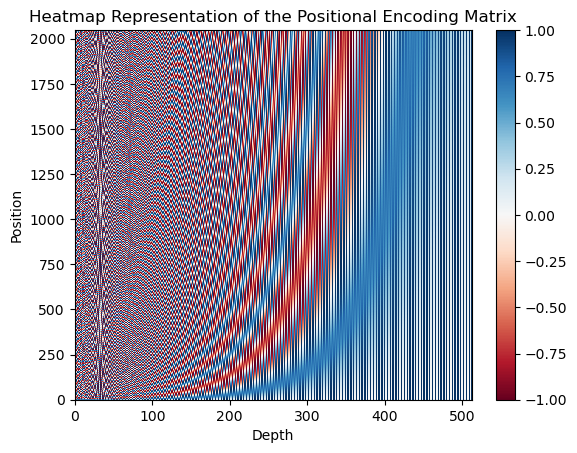

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

assert pos_matrix.shape == (L, d)
plt.pcolormesh(pos_matrix, cmap='RdBu')
plt.xlabel('Depth')
plt.ylabel('Position')
plt.title('Heatmap Representation of the Positional Encoding Matrix')
plt.colorbar()
plt.show()    

plt.savefig("section04_figure01_PEM.jpg")

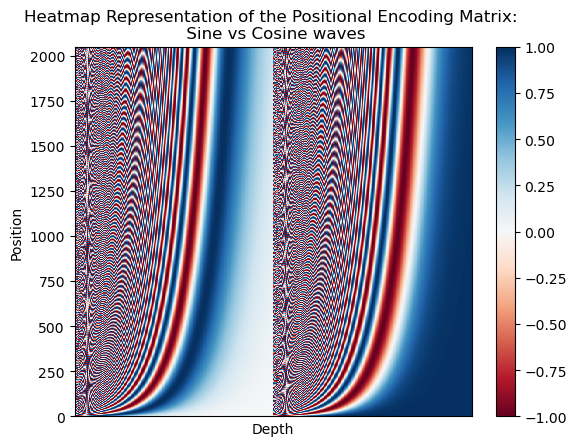

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

assert pos_matrix.shape == (L, d)
# Plot the positional encoding matrix, alternative way
plt.pcolormesh(np.hstack([pos_matrix[:, ::2], pos_matrix[:, 1::2]]), cmap='RdBu')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # remove x-axis ticks (meaningless)
plt.xlabel('Depth')
plt.ylabel('Position')
plt.title('Heatmap Representation of the Positional Encoding Matrix: \n Sine vs Cosine waves')
plt.colorbar()
plt.show()

plt.savefig("section04_figure02_PEM_sineVScosine.jpg")

“Depth” in the matrix represents the frequncy of different sine (even) & cosine (odd) waves.
Lets' plot a few exemplar ones

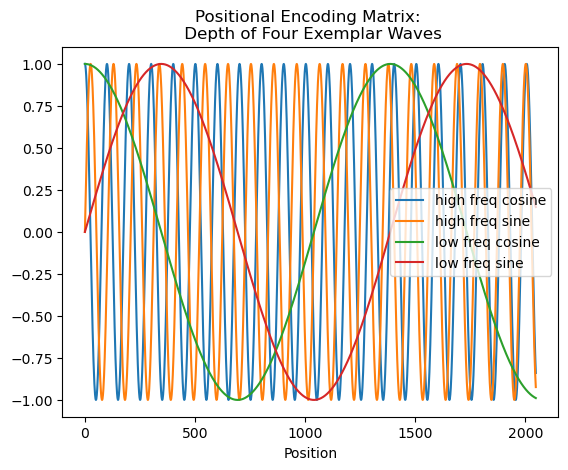

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

plt.plot(pos_matrix[:, 155], label="high freq cosine")
plt.plot(pos_matrix[:, 156], label="high freq sine")
plt.plot(pos_matrix[:, 301], label="low freq cosine")
plt.plot(pos_matrix[:, 300], label="low freq sine")
plt.xlabel('Position')
plt.title('Positional Encoding Matrix: \n Depth of Four Exemplar Waves')
plt.legend()
plt.show()

plt.savefig("section04_figure03_PEM_depth.jpg")

This is how 'position' looks like:

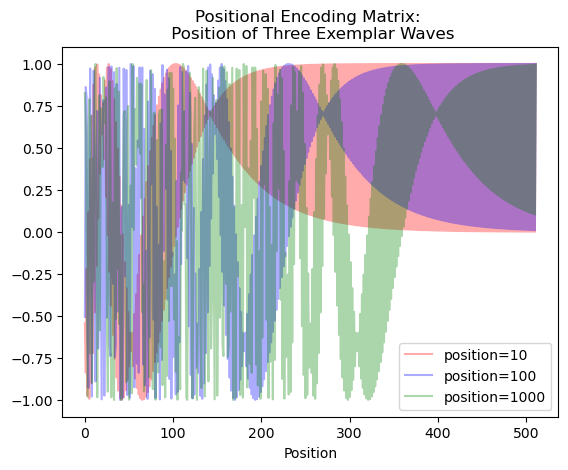

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
 
assert pos_matrix.shape == (L, d)
# Plot two curves from different position
plt.plot(pos_matrix[10], alpha=0.33, color="red", label="position=10")
plt.plot(pos_matrix[100], alpha=0.33, color="blue", label="position=100")
plt.plot(pos_matrix[1000], alpha=0.33, color="green", label="position=1000")
plt.xlabel('Position')
plt.title('Positional Encoding Matrix: \n Position of Three Exemplar Waves')
plt.legend()
plt.show()

plt.savefig("section04_figure04_PEM_position.jpg")

To measure the similarity or distance between two positional encoding vectors, one can use the same ones as for k-means, including Euclidean distance (the square root of the sum of the squares of the differences between the corresponding coordinates of the vectors; typically used when the vectors are in the same number of dimensions and the dimensions are in the same scale), Cosine similarity (the dot product of the two vectors divided by the product of their magnitudes; useful when the dimensions are not in the same scale), and Manhattan (or L1) distance (the sum of absolute differences between the coordinates of the vectors).

Note, however, that these measures are defined in the positional encoding space, and they doesn't take into account any meaning that could be associated with the position, they just measure how different the position of two encoding vectors is. 

Let's compute and visualize the distance between couples of encoding vectors using cosine distance. Cosine distance ranges from -1 to 1, a cosine similarity of 1 means the vectors have the same direction and a cosine similarity of -1 means the vectors are in opposite direction.

In [8]:
import numpy as np

def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    magnitude_a = np.linalg.norm(a)
    magnitude_b = np.linalg.norm(b)
    return dot_product / (magnitude_a * magnitude_b)
  
similarity = cosine_similarity(pos_matrix[10], pos_matrix[11])
print("Cosine Similarity between positions 10 and 11: ", similarity)
similarity = cosine_similarity(pos_matrix[10], pos_matrix[100])
print("Cosine Similarity between positions 10 and 100: ", similarity)
similarity = cosine_similarity(pos_matrix[10], pos_matrix[1000])
print("Cosine Similarity between positions 10 and 1000: ", similarity)

Cosine Similarity between positions 10 and 11:  0.9730550696381367
Cosine Similarity between positions 10 and 100:  0.4458579829085236
Cosine Similarity between positions 10 and 1000:  0.1776413786810582


Another way of measuring the distance between vector pairs is by using the dot-product of two normalized vectors is 1 if they are identical and drops quickly as they move apart. 

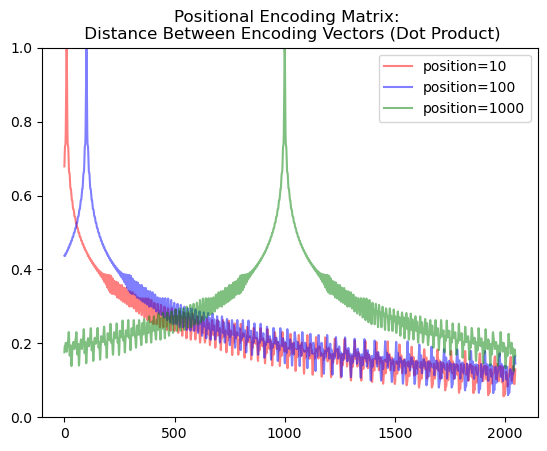

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

assert pos_matrix.shape == (L, d)
# Show the dot product between different normalized positional vectors
pos_matrix_norm = pos_matrix / np.linalg.norm(pos_matrix, axis=1, keepdims=True)
#pos_matrix /= np.linalg.norm(pos_matrix, axis=1, keepdims=True)
p_10 = pos_matrix_norm[10]  # all vectors compare to vector at position 10
p_100 = pos_matrix_norm[100]  # all vectors compare to vector at position 100
p_1000 = pos_matrix_norm[1000]  # all vectors compare to vector at position 1000

dots_10 = pos_matrix_norm @ p_10
dots_100 = pos_matrix_norm @ p_100
dots_1000 = pos_matrix_norm @ p_1000

plt.plot(dots_10, alpha=0.5, color="red", label="position=10")
plt.plot(dots_100, alpha=0.5, color="blue", label="position=100")
plt.plot(dots_1000, alpha=0.5, color="green", label="position=1000")

plt.ylim([0, 1])
plt.title('Positional Encoding Matrix: \n Distance Between Encoding Vectors (Dot Product)')
plt.legend()
plt.show()

plt.savefig("section04_figure05_PEM_position_distance.jpg")